# Podstawy sieci neuronowych, wykłady 1-2

# Wojciech Broniowski

## Instytut Fizyki, Uniwersytet Jana Kochanowskiego w Kielcach

# Inżynieria danych 2019/20

## Wersja z 18.04.2020

- Koncepcja wykładu: podstawy sieci neuronowych "od podszewki", bogata ilustracja przykładami w pythonie.
- Ćwiczenia: "goły" python, tj. konstruowanie i używanie prostych narzędzi bez użycia zaawansowanych bibliotek.
- Projekt własny: program w pythonie wg poznanych na wykładzie i ćwiczeniach metod, rozwiązujący proste zagadnienie zgodne z materiałem zajęć, prezentacja na ćwiczeniach.

- Ocena: zadania do wykładu przesłane mailem - 35%, projekt własny z prezentacją - 65%.
       

## Zajęcia (począwszy od 3. tyg.) odbywają się zdalnie

Link do vidyo: https://vidyoportal.cern.ch/join/o5nBkbwSf9

In [1]:
# wersja pythona
!python --version

Python 2.7.16


### Kwestia kompatybilności - jeśli coś inaczej się zachowuje u mnie i Państwa, proszę porównać wersje pakietów.

In [2]:
# !pip list

# Importowane pakiety

In [3]:
import math  as m
import numpy as np

# liczby losowe
import random

# grafika do wykresów
import matplotlib.pyplot as plt
import matplotlib as mpl

# działania na łańcuchach znaków
import string 

# statystyka
import statistics as st

# pomar czasu
import time

# dopasowywanie krzywych do danych
from scipy.optimize import curve_fit

# wyświetlanie importowanej grafiki
from IPython.display import display, Image

# wykresy konturowe
import matplotlib.cm as cm

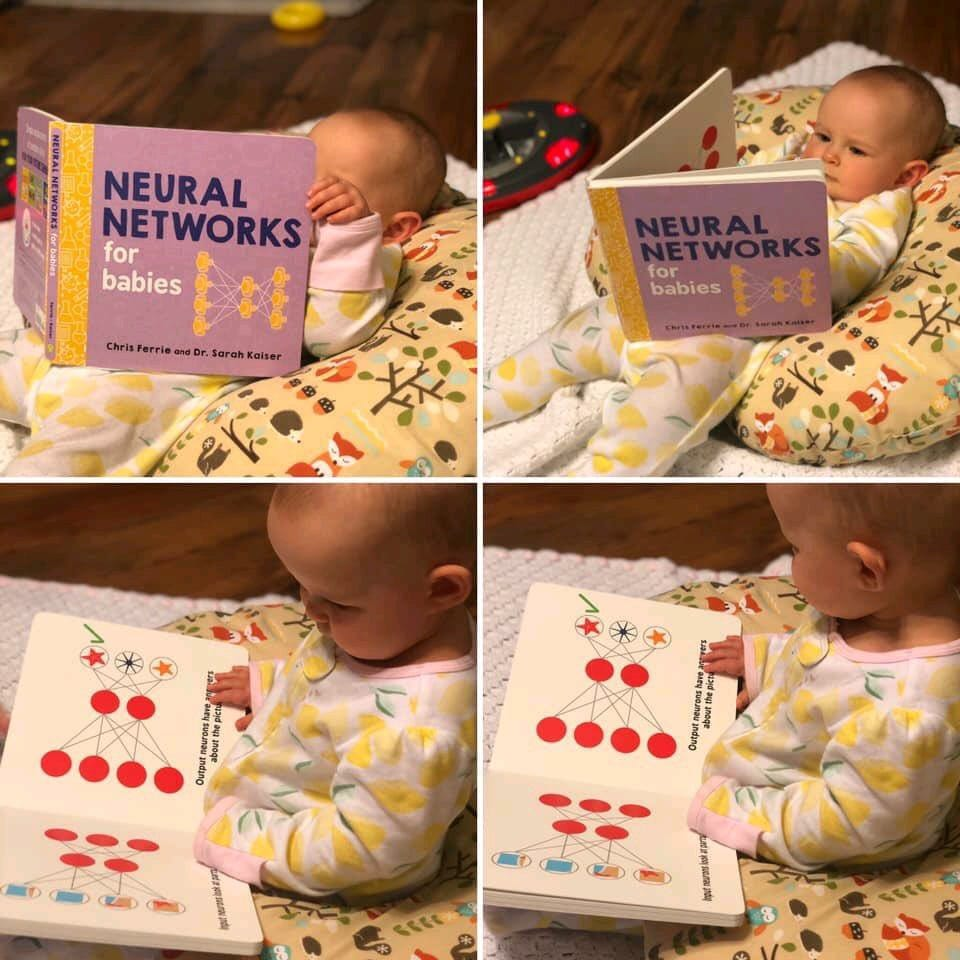

In [4]:
Image(filename="images/cover.jpg",width=500)

https://www.facebook.com/search/top/?q=deeplearning.ai&epa=SEARCH_BOX

# Wykład 1

Inspiracja dla obliczeniowych modeli matamatycznych pochodząca od struktury biologicznej układu neuronowego.

# Pojedynczy neuron

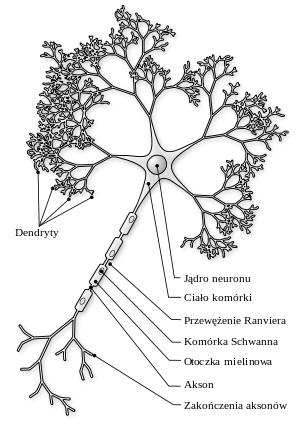

In [5]:
Image(filename="images/neuron.png",width=400)

Dendryty w komórce nerwowej odbierają bodźce, jądro przetwarza i decyduje, czy "odpalić" sygnał wzdłuż aksonu

The speed of a nerve impulse varies with the type of nerve impulse the nervous system is sending. Some signals such as those for muscle position, travel at speeds up to 119m/s. Nerve impulses such as pain signals travel slower at 0.61m/s. Touch signals travel at speeds of 76.2m/s.

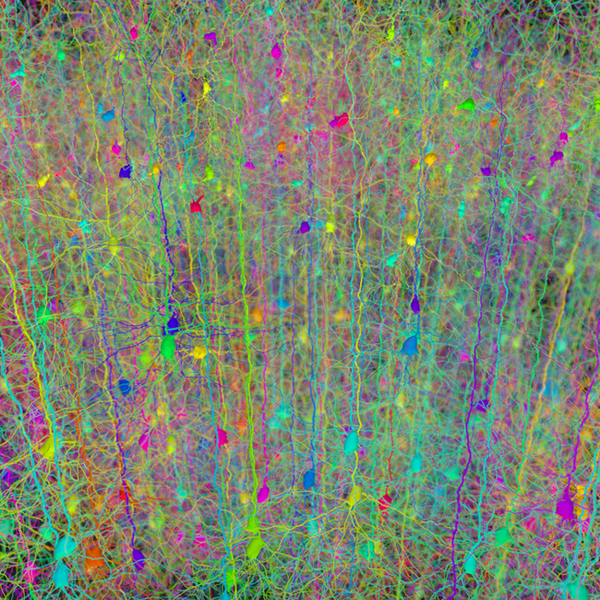

In [6]:
Image(filename="images/pyramidal.png",width=400)

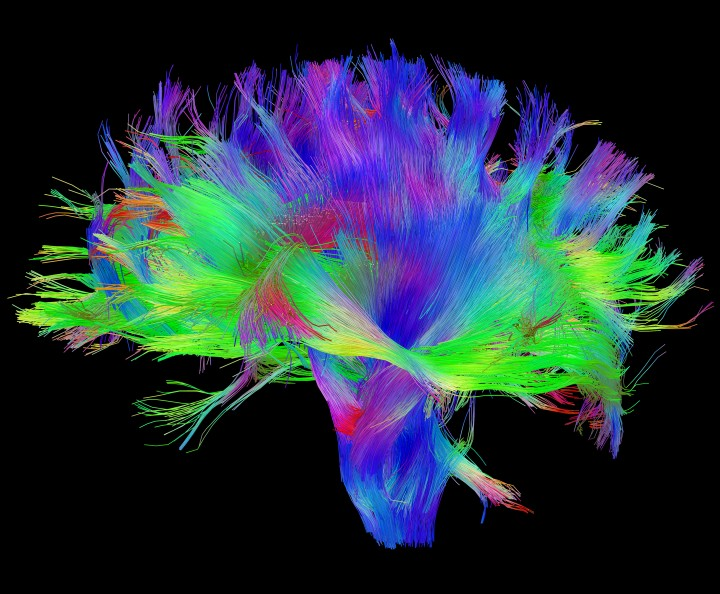

In [7]:
Image(filename="images/brain.jpg",width=400)

https://human-memory.net/brain-neurons-synapses/

**Mózg:**

The average human brain has about 86 billion neurons(or nerve cells) and many more neuroglia (or glial cells) which serve to support and protect the neurons. Each neuron may be connected to up to 10,000 other neurons, passing signals to each other via as many as 1,000 trillion synaptic connections, equivalent by some estimates to a computer with a 1 trillion bit per second processor. Estimates of the human brain’s memory capacity vary wildly from 1 to 1,000 terabytes (for comparison, the 19 million volumes in the US Library of Congress represents about 10 terabytes of data).  

(American billion=$10^9$, trillion=$10^{12}$)



**Bardzo "powolny":**

Based on the energy budget of the brain, it appears that the average cortical neuron fires around 0.16 times per second. It seems unlikely that the average cortical neuron spikes much more than once per second.


https://backyardbrains.com/experiments/reactiontime

**Refleks:**

The average reaction time for humans is 0.25 seconds to a visual stimulus, 0.17 for an audio stimulus, and 0.15 seconds for a touch stimulus.

Falstart w biegach sprinterskich: czas reakcji krótszy niż 0.1s.

Poniżej zupełnie inny "model obliczeniowy": **maszyna Von Neumanna** (jeden lub kilka procesorów)

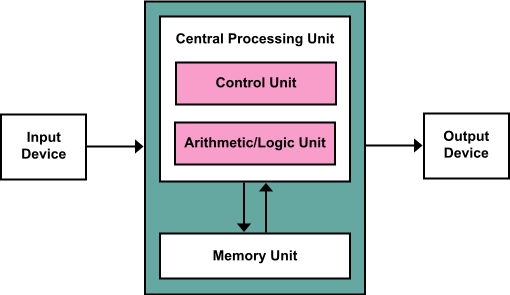

In [8]:
Image(filename="images/Von_Neumann.png",width=600)

## Ideowa koncepcja sieci neuronowej (tutaj tzw. feed-forward - sygnały idą do przodu z porzedniej warstwy do kolejnej)

input $\to$ warstwy pośrednie $\to$ output

deep learning - wiele warstw pośrednich

Schematy połączeń neuronowych mogą być różne, tutaj: "pełne" połączenie między sąsiadującymi warstwami

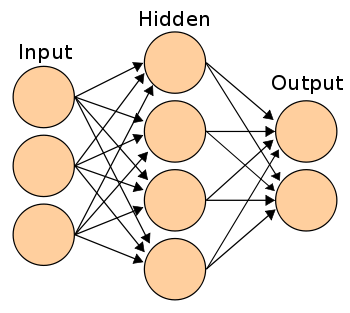

In [9]:
Image(filename="images/neural_network.png",width=330)

## Neuron MCP (Warren McCulloch, Walter Pitts, 1942)

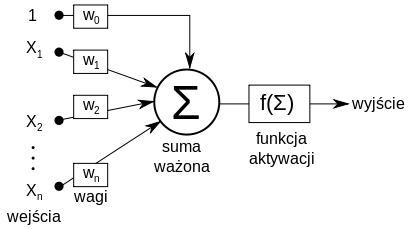

In [10]:
Image(filename="images/McCulloch-Pitts.png",width=470)

In [11]:
x = [1,3,1]
w = [1,1,2]

In [12]:
# suma ważona = iloczyn skalarny
# jest to sygnał wchodzący do neuronu: s=x0 w0 + x1 w1 + x2 w2

np.dot(x,w)

6

In [13]:
# funkcja aktywacji = funkcja schodkowa
def step(s):
     if s > 0:
        return 1
     else:
        return 0
    
def f(s):
    return step(s)

In [14]:
s = np.linspace(-2, 2, 100)

In [15]:
fs = [f(z) for z in s]

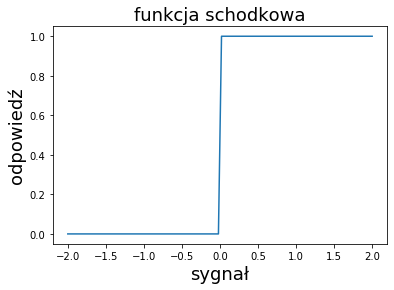

In [16]:
plt.xlabel('sygnał',fontsize=18)
plt.ylabel('odpowiedź',fontsize=18)
plt.title('funkcja schodkowa',fontsize=18)

plt.plot(s, fs);

In [17]:
# przykładowa tablica

a=[1,2,3]
a

[1, 2, 3]

In [18]:
# wszczepienie elementu "1" na pozycji 0
np.insert(a,0,1)

array([1, 1, 2, 3])

In [19]:
# funkcja aktywacji = funkcja schodkowa
def step(s):
     if s > 0:
        return 1
     else:
        return 0
    
def f(s):
    return step(s)

### Neuron MCP

In [20]:
# np.insert(x,0,1) dodaje 1 na początku, aby niepotrzebnie tego nie pisać 
def neuron(x,w):
    return f(np.dot(np.insert(x,0,1),w))

In [21]:
neuron([10],[-2,1])

1

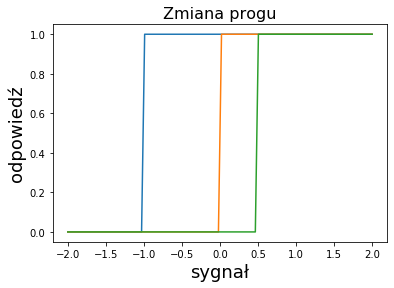

In [22]:
s = np.linspace(-2, 2, 100)
fs1 = [neuron([x],[1,1]) for x in s]
fs0 = [neuron([x],[0,1]) for x in s]
fsm12 = [neuron([x],[-1/2,1]) for x in s]

plt.xlabel('sygnał',fontsize=18)
plt.ylabel('odpowiedź',fontsize=18)

plt.title("Zmiana progu",fontsize=16)

plt.plot(s, fs1)
plt.plot(s, fs0)
plt.plot(s, fsm12);

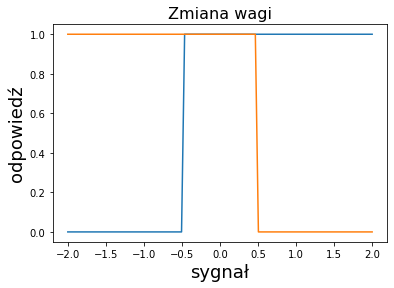

In [23]:
s = np.linspace(-2, 2, 100)
gs1 = [neuron([x],[1/2,1]) for x in s]
gsm1 = [neuron([x],[1/2,-1]) for x in s]

plt.xlabel('sygnał',fontsize=18)
plt.ylabel('odpowiedź',fontsize=18)

plt.title("Zmiana wagi",fontsize=16)

plt.plot(s, gs1)
plt.plot(s, gsm1);

## Tabelki logiczne (funkcje boolowskie)

In [24]:
for i in [0,1]: 
    for j in [0,1]: 
        print(i,j,neuron([i,j],[-1,.6,.6]))

0 0 0
0 1 0
1 0 0
1 1 1


In [25]:
def neurAND(i,j):
    return neuron([i,j],[-1,.6,.6])

In [26]:
for i in [0,1]: 
    for j in [0,1]: 
        print(i,j,neurAND(i,j))

0 0 0
0 1 0
1 0 0
1 1 1


In [27]:
def neurNAND(i,j):
    return neuron([i,j],[1,-0.6,-0.6])

In [28]:
for i in [0,1]: 
    for j in [0,1]: 
        print(i,j,neurNAND(i,j))

0 0 1
0 1 1
1 0 1
1 1 0


Spostrzeżenie: zaprzeczenie uzyskujemy poprzez zmianę znaku wszystkich wag

In [29]:
def neurOR(i,j):
    return neuron([i,j],[-1,1.2,1.2])

In [30]:
for i in [0,1]: 
    for j in [0,1]: 
        print(i,j,neurOR(i,j))

0 0 0
0 1 1
1 0 1
1 1 1


In [31]:
def neurNOR(i,j):
    return neuron([i,j],[1,-1.2,-1.2])

In [32]:
for i in [0,1]: 
    for j in [0,1]: 
        print(i,j,neurNOR(i,j))

0 0 1
0 1 0
1 0 0
1 1 0


In [33]:
def neurNOT(i):
    return neuron([i],[1,-1.2])

In [34]:
neurNOT([1])

0

## Uwagi:

Zupełność bramek NAND lub NOR: każdą funcję boolowską (tj. funkcję o argumentach i warośćiach będących zmiennymi logicznymi) można zbudować składając wyłącznie bramki NAND, lub też bramki NOR.


XOR, czyli alternatwa wykluczająca

0 0 0 

0 1 1

1 0 1

1 1 0

Dowód, że bramki XOR nie można utworzyć z pomocą jednego neuronu:

Z pierszego wiersza tabeli wartości logicznych powyżej wynika, że dla inputów 0 0 neuron ma nie odpalić. Zatem 

w0 * 1 + w1 * 0 + w2 * 0 < 0

czyli w0 < 0 lub 

-w0>0

Podobnie, dla sytuacji z dwóch kolejnych wierszy neuron ma odpalić, więc 

w0+w2>0

w0+w1>0

Dodajac 3 ostatnie równości stronami dostajemy

w0+w1+w2>0

Natomiast dla sytuacji z czwartego wiersza tabeli dostajemy

w0+w1+w2<0, 

co jest w sprzeczności do poprzedniej nierówności. Tak więc nie ma takich wag w0, w1, w2, aby zrealizować bramkę XOR z pomocą jednego neuronu. 


### Bramka XOR ze złożenia AND, NAND i OR

In [35]:
def neurXOR(i,j):
    return neurAND(neurNAND(i,j),neurOR(i,j))

In [36]:
for i in [0,1]: 
    for j in [0,1]: 
        print(i,j,neurXOR(i,j))

0 0 0
0 1 1
1 0 1
1 1 0


### Bramka XOR ze złożenia bramek NAND

[ A NAND ( A NAND B ) ] NAND [ B NAND ( A NAND B ) ] 

In [37]:
def neurXOR(i,j):
    return neurNAND(neurNAND(i,neurNAND(i,j)),neurNAND(j,neurNAND(i,j)))

In [38]:
for i in [0,1]: 
    for j in [0,1]: 
        print(i,j,neurXOR(i,j))

0 0 0
0 1 1
1 0 1
1 1 0


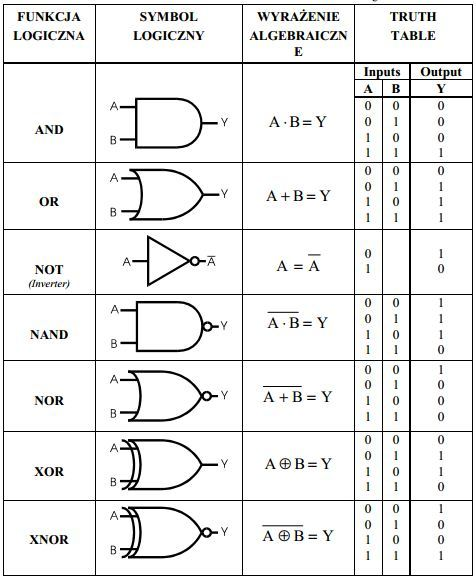

In [39]:
Image(filename="images/sym_bl.jpg",width=500)

## Zadania na pracownię:

- Bramki NOT, NOR
- Operacje OR, AND, NOT ze złożeń bramki NAND
- Sumator półpełny i pełny


https://en.wikipedia.org/wiki/NAND_logic

https://pl.wikipedia.org/wiki/Sumator_(uk%C5%82ad_logiczny)

## Rozwiązania

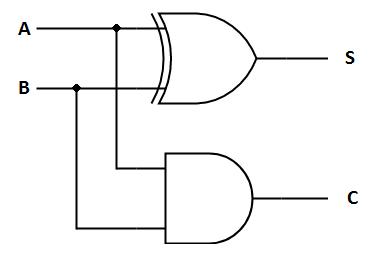

In [40]:
# rysunki z powyższego linku

Image(filename="images/Half-adder.png",width=270)

In [41]:
def sum_pol(A,B):
    S=neurXOR(A,B)
    C=neurAND(A,B)
    return[S,C]

In [42]:
for i in [0,1]: 
    for j in [0,1]: 
        print(i,j,sum_pol(i,j))

0 0 [0, 0]
0 1 [1, 0]
1 0 [1, 0]
1 1 [0, 1]


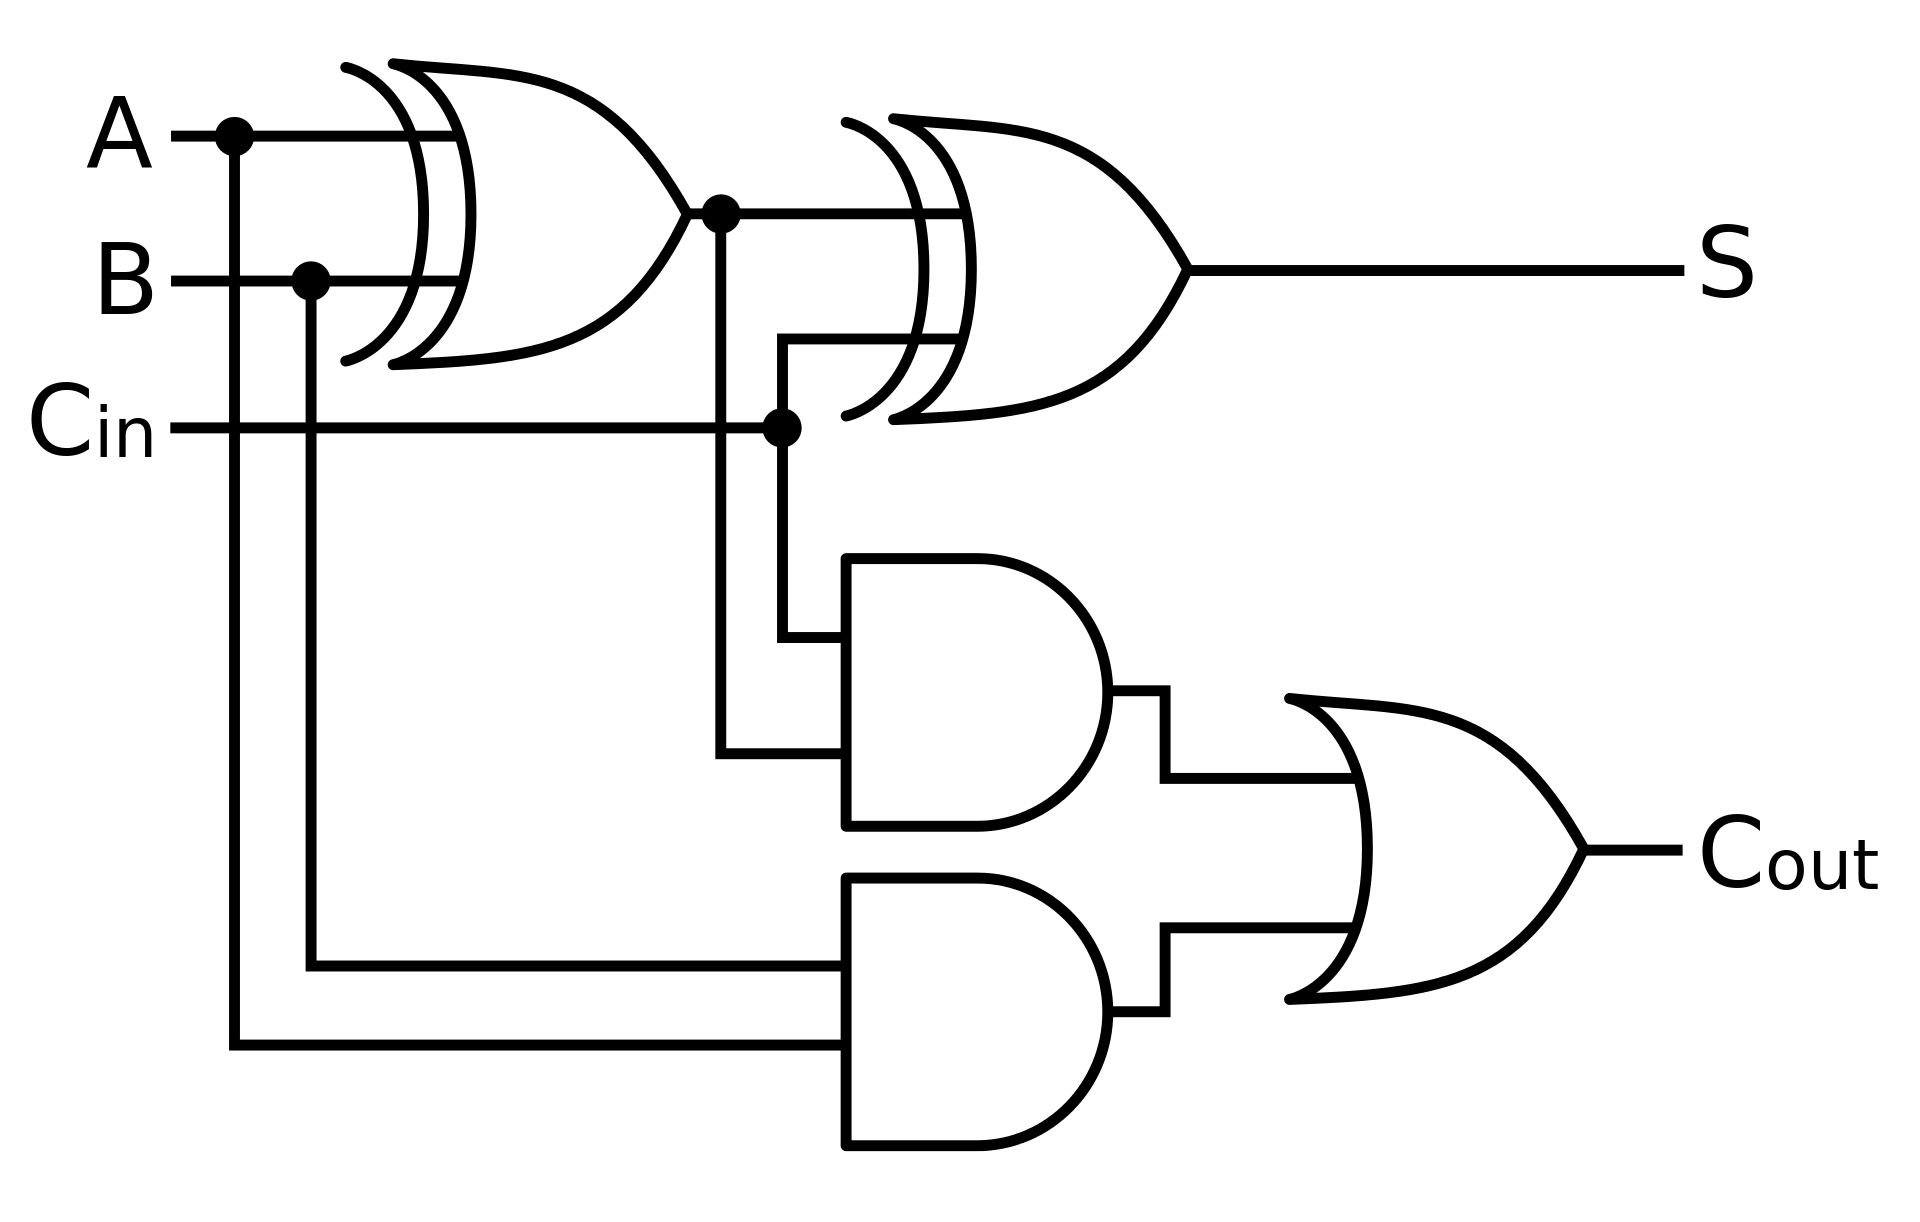

In [43]:
Image(filename="images/Full-adder.png",width=320)

In [44]:
def sum_pelny(A,B,Cin):
    S=neurXOR(neurXOR(A,B),Cin)
    Cout=neurOR(neurAND(neurXOR(A,B),Cin),neurAND(A,B))
    return[S,Cout]

In [45]:
for i in [0,1]: 
    for j in [0,1]: 
        for k in [0,1]:
            print(i,j,k,sum_pelny(i,j,k))

0 0 0 [0, 0]
0 0 1 [1, 0]
0 1 0 [1, 0]
0 1 1 [0, 1]
1 0 0 [1, 0]
1 0 1 [0, 1]
1 1 0 [0, 1]
1 1 1 [1, 1]


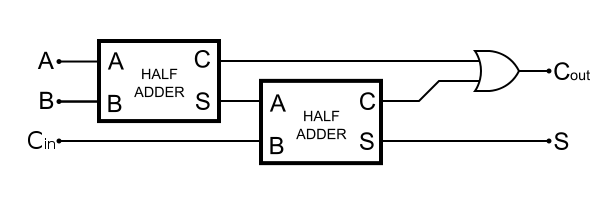

In [46]:
Image(filename="images/2_Half_Adder.png",width=500)

In [47]:
def sum_pelny_2(A,B,Cin):
    [S1,C1]=sum_pol(A,B)  
    [S2,C2]=sum_pol(S1,Cin)
    return [S2,neurOR(C1,C2)]

In [48]:
for i in [0,1]: 
    for j in [0,1]: 
        for k in [0,1]:
            print(i,j,k,sum_pelny_2(i,j,k))

0 0 0 [0, 0]
0 0 1 [1, 0]
0 1 0 [1, 0]
0 1 1 [0, 1]
1 0 0 [1, 0]
1 0 1 [0, 1]
1 1 0 [0, 1]
1 1 1 [1, 1]


# Wykład 2

# Neuron liniowy z filtrem jako model pamięci

Do zrozumienia tej części wykładu potrzebne są elementarne wiadomości z algebry liniowej, jak mnożenie macieży, iloczyn skalarny, itp. 

## Pamięć heteroasocjatywna (skojarzeniowa)

In [49]:
 # układy pikseli dające dany symbol
    
A = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],     
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] ) 
    
a = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],     
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
     
ii =  np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],     
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],  
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
     
I = np.array( [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],     
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  
      [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
     
nic =  np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],     
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  
      [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])   

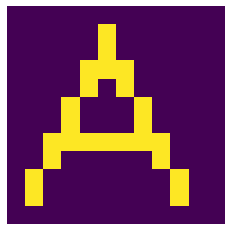

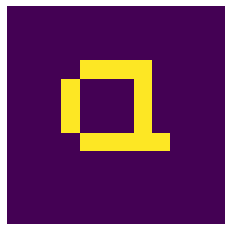

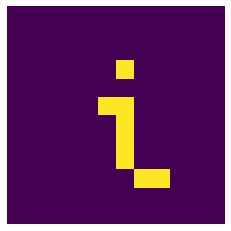

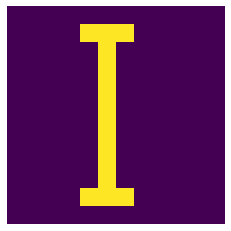

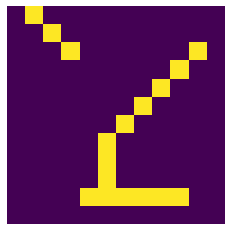

In [50]:
for m in [A,a,ii,I,nic]:
    plt.axis("off")
    plt.imshow(m)
    plt.show();

## "Spłaszczenie" macierzy do wektorów (dla wygody)

In [51]:
fA=A.flatten()
fa=a.flatten()
fi=ii.flatten()
fI=I.flatten()
fnic=nic.flatten()

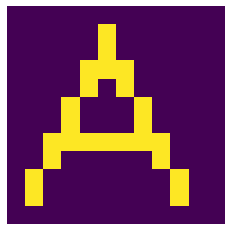

In [52]:
plt.axis("off")
plt.imshow(A);

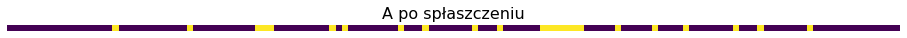

In [53]:
fig = plt.figure(figsize=(16, 4))
plt.axis("off")
plt.title("A po spłaszczeniu",fontsize=16)
plt.imshow([fA]);

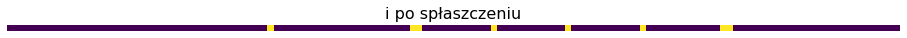

In [54]:
fig = plt.figure(figsize=(16, 4))
plt.axis("off")
plt.title("i po spłaszczeniu",fontsize=16)
plt.imshow([fi]);

In [55]:
np.dot(fA,fA)

24

In [56]:
np.dot(fA,fi)

2

## Suma iloczynów zewnętrznych 

In [57]:
# iloczyn zewnętrzny dwóch wektorów (iloczyn diadyczny, diada)
np.outer([1,2,3],[2,7,0])

array([[ 2,  7,  0],
       [ 4, 14,  0],
       [ 6, 21,  0]])

## Macierz modelująca pamięć kojarzącą A-a, a-A, I-i, i-I

In [58]:
M=np.outer(fA,fa)+np.outer(fa,fA)+np.outer(fi,fI)+np.outer(fI,fi)

Niech macierz $M = V v^T + W w^T$. Wówczas $M v= V v \cdot v + W w \cdot v$, zatem 

$M v / v \cdot v = V + W \cdot v/ v \cdot v$.

Jeśli wektory $v$ i $w$ są ortogonalne $w \cdot v =0$, wówczas $M v / v \cdot v = V$, czyli dostajemy dokładnie skojarzony wektor. W przeciwnym wypadku powstaje pewien błąd $W \cdot v/ v \cdot v$, który na ogół jest mały, jeśli wymiar wektorów jest duży w porównaniu z liczbą zapamiętywanych symboli.

Podsummując, operacja $M v / v \cdot v$ zwraca z dobrym przybliżeniem symbol skojarzny z $v$. 

In [59]:
Ap=(np.dot(M,fA)/np.dot(fA,fA)).reshape(12,12)
ap=(np.dot(M,fa)/np.dot(fa,fa)).reshape(12,12)
ip=(np.dot(M,fi)/np.dot(fi,fi)).reshape(12,12)
Ip=(np.dot(M,fI)/np.dot(fI,fI)).reshape(12,12)
nicp=(np.dot(M,fnic)/np.dot(fnic,fnic)).reshape(12,12)

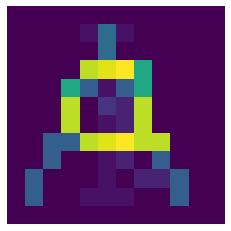

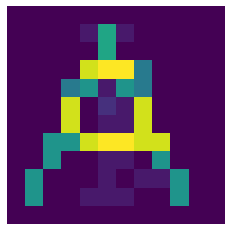

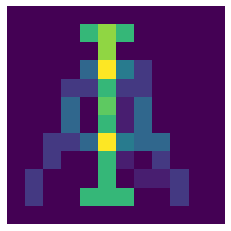

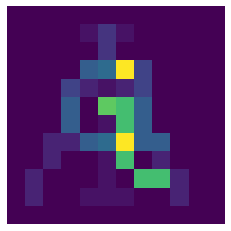

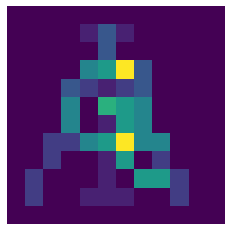

In [60]:
 for m in [Ap,ap,ip,Ip,nicp]:
    plt.axis("off")
    plt.imshow(m)
    plt.show();

In [61]:
print(np.round(Ap,2))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.08 0.58 0.08 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.58 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.5  1.58 1.67 1.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.5  0.08 0.5  1.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.5  0.   0.25 0.17 1.5  0.   0.   0.   0.  ]
 [0.   0.   0.   1.5  0.   0.08 0.17 1.5  0.   0.   0.   0.  ]
 [0.   0.   0.5  0.5  1.5  1.58 1.67 1.5  1.5  0.   0.   0.  ]
 [0.   0.   0.5  0.   0.   0.08 0.17 0.   0.5  0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.08 0.   0.17 0.17 0.5  0.   0.  ]
 [0.   0.5  0.   0.   0.08 0.08 0.08 0.   0.   0.5  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


## Nałożenie filtra np.sign(np.floor()) - piksele o wartości poniżej 1 daja 0, a o wartości powyżej 1 dają 1

In [62]:
np.floor(3.3)

3.0

In [63]:
np.sign(0), np.sign(3)

(0, 1)

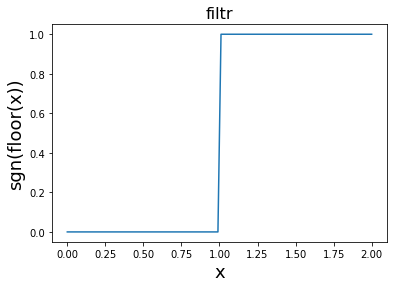

In [64]:
s = np.linspace(0, 2, 100)
fs = [np.sign(np.floor(x)) for x in s]

plt.xlabel('x',fontsize=18)
plt.ylabel('sgn(floor(x))',fontsize=18)

plt.title("filtr",fontsize=16)

plt.plot(s, fs)
plt.show()

Spostrzeżenie: Taki sam efekt filtrowania można uzyskać dodając (do każdego piksela) neuron MPC z wagami $w_0=-1$, $w_1=1$.

In [65]:
print(np.sign(np.floor(Ap)))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


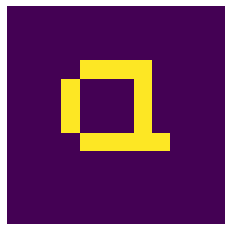

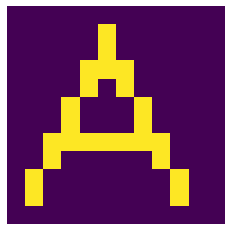

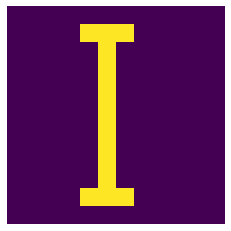

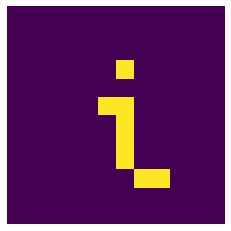

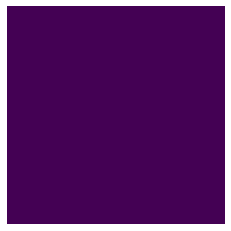

In [66]:
for m in [Ap,ap,ip,Ip,nicp]:
    plt.axis("off")
    plt.imshow(np.sign(np.floor(m)))
    plt.show();

## Interpretacja modelu pamięci heteroasocjatywnej jako sieci neuronowej

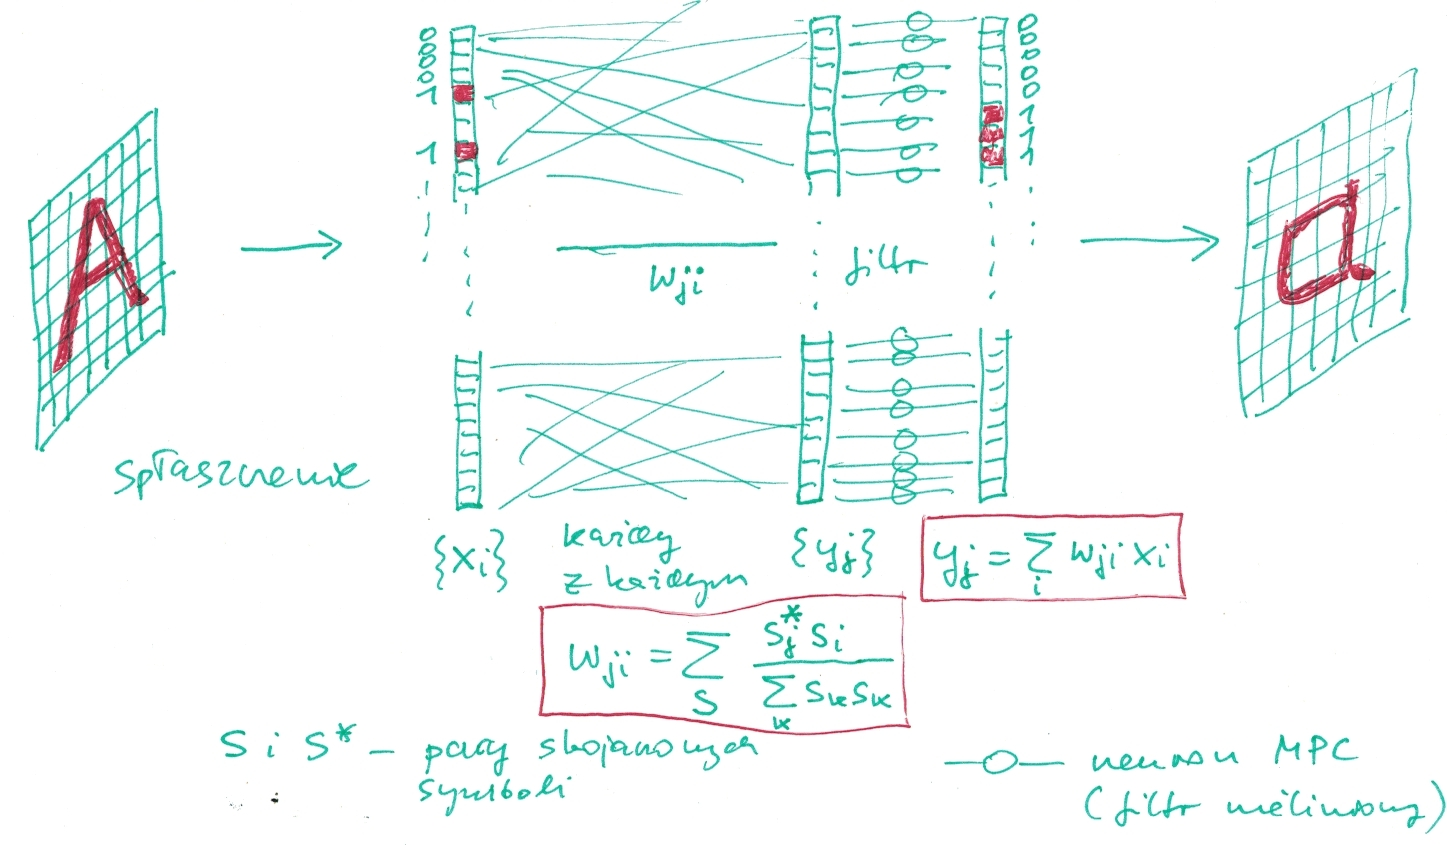

In [67]:
Image(filename="images/het.jpg",width=900)

Podsumowanie modelu:

Definiujemy pary skojarzonych symboli $(S,S^*)$ i przygotowujemy macierz wag o elementach $w_{ji}$. Jest to ta sama macierz co macierz M wprowadzona w kodzie powyżej. W tym momencie mamy gotową sieć, którą możemy stosować do generowania skojarzeń. Kolejne kroki są następujące:

1. Input to macierz pikseli o wartościach 0, 1.

2. Spłaszczenie macierzy pikseli do jednego wektora

3. Między warstwą x i y transmisja sygnału jest liniowa (nie ma progów itp.) - wykoujemy zwykłe mnożenie macierzowe sygnału przez macierz wag, tj. $y_j=\sum_i w_{ji} x_i$.

4. Nieliniowość zawarta jest w filtrze. 

5. Przefiltrowany wektor "tniemy" na macierz pikseli. która stanowi output.

# Pamięć autoasocjatywna

Analogiczna konstrukcja jak powyżej, tylko teraz symbol jest kojarzony sam ze sobą.

In [68]:
Ma=np.outer(fA,fA)+np.outer(fa,fa)+np.outer(fi,fi)+np.outer(fI,fI)

In [69]:
Ap=(np.dot(Ma,fA)/np.dot(fA,fA)).reshape(12,12)
ap=(np.dot(Ma,fa)/np.dot(fa,fa)).reshape(12,12)
ip=(np.dot(Ma,fi)/np.dot(fi,fi)).reshape(12,12)
Ip=(np.dot(Ma,fI)/np.dot(fI,fI)).reshape(12,12)
nicp=(np.dot(Ma,fnic)/np.dot(fnic,fnic)).reshape(12,12)

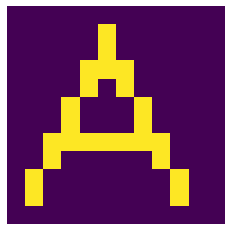

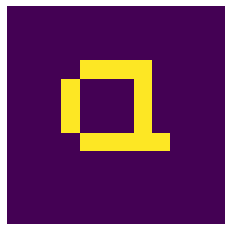

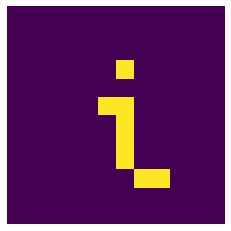

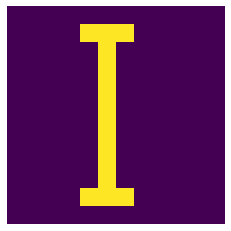

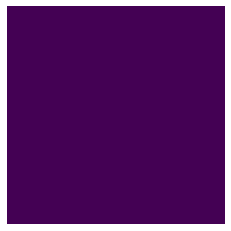

In [70]:
 for m in [Ap,ap,ip,Ip,nicp]:
    plt.axis("off")
    plt.imshow(np.sign(np.floor(m)))
    plt.show();

## Zaszumienie obrazu

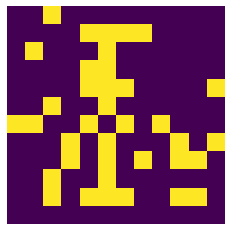

In [71]:
# można wykonać dla różnych symboli: A, a, ... itd.
Z=np.copy(I)

# liczba losowych przekłamań 
lb=30

for n in range(0,lb-1):
     i=random.randint(0,11)
     j=random.randint(0,11)
     Z[i,j]=-Z[i,j]+1

plt.axis("off")
plt.imshow(Z);

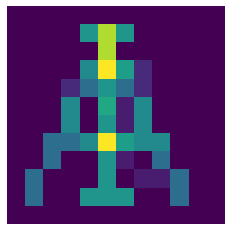

In [72]:
fZ=Z.flatten()

Zp=(np.dot(Ma,fZ)/np.dot(fZ,fZ)).reshape(12,12)

plt.axis("off")
plt.imshow(Zp);

In [73]:
print(Zp)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.35135135 0.59459459
  0.35135135 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.59459459
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.32432432 0.67567568
  0.37837838 0.08108108 0.         0.         0.         0.        ]
 [0.         0.         0.         0.08108108 0.24324324 0.35135135
  0.24324324 0.08108108 0.         0.         0.         0.        ]
 [0.         0.         0.         0.32432432 0.         0.40540541
  0.05405405 0.32432432 0.         0.         0.         0.        ]
 [0.         0.         0.         0.32432432 0.         0.35135135
  0.05405405 0.32432432 0.         0.         0.         0.        ]
 [0.         0.         0.24324324 0.24324324 0.3

## Nałożenie filtra, tutaj poprzez zaokrąglenie np.sign(np.round)

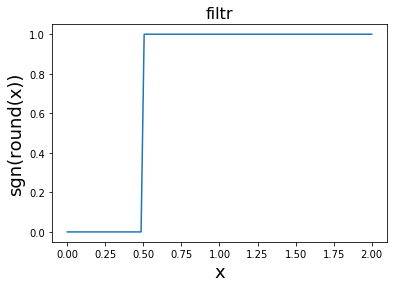

In [74]:
s = np.linspace(0, 2, 100)
fs = [np.sign(np.round(x)) for x in s]

plt.xlabel('x',fontsize=18)
plt.ylabel('sgn(round(x))',fontsize=18)

plt.title("filtr",fontsize=16)

plt.plot(s, fs);

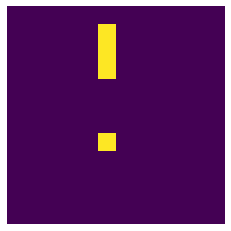

In [75]:
Zcor=np.sign(np.round(Zp))
plt.axis("off")
plt.imshow(Zcor);

## Podsumowanie działania metody

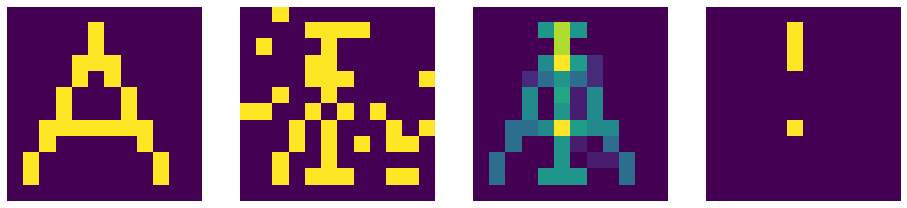

In [76]:
fig = plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(A)
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(Z)
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(Zp)
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(Zcor)
plt.axis('off')
plt.show()

Związek powyższego z sieciami neuronowymi o jednej warstwie
Filtr jest operacją nieliniową!
Nie ma sensu dawać więcej warstw pośrednich
(Reguła Hobbsa)

## Zadania na pracownię:


- Pamięć skojarzeniowa dla innych symboli
- Pamięć autoasocjatywna dla innych symboli
- Ustawienie dowolnego poziomu filtra z pomocą instrukcji if
- Pamięć skojarzeniowa z zaszumieniem
- Sprawdzić statystycznie, dla jakiego stopnia zaszumienia metoda rozpoznawania działa (dla pamięci autoasocjacyjnej i skojarzeniowej)

### Rozwiązania

In [77]:
# filtr o dowolnym progu
def filtr(x,prog):
    if x>prog:
        return 1
    else:
        return 0
    

In [78]:
filtr(2,.7)

1

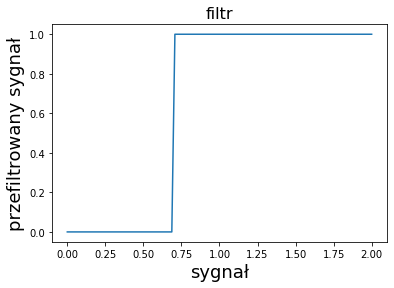

In [79]:
s = np.linspace(0, 2, 100)
fs = [filtr(x,0.7) for x in s]

plt.xlabel('sygnał',fontsize=18)
plt.ylabel('przefiltrowany sygnał',fontsize=18)

plt.title("filtr",fontsize=16)

plt.plot(s, fs);